In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

Thu Jul  1 14:51:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!unzip -O cp949 '/content/drive/MyDrive/5kfood.zip' -d '/content/6food'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/6food/삼계탕/Img_138_0013.JPG  
  inflating: /content/6food/삼계탕/Img_138_0014.jpg  
  inflating: /content/6food/삼계탕/Img_138_0015.jpg  
  inflating: /content/6food/삼계탕/Img_138_0016.jpg  
  inflating: /content/6food/삼계탕/Img_138_0017.jpg  
  inflating: /content/6food/삼계탕/Img_138_0018.jpg  
 extracting: /content/6food/삼계탕/Img_138_0019.jpg  
 extracting: /content/6food/삼계탕/Img_138_0020.jpg  
  inflating: /content/6food/삼계탕/Img_138_0021.jpg  
  inflating: /content/6food/삼계탕/Img_138_0022.jpg  
 extracting: /content/6food/삼계탕/Img_138_0023.jpg  
  inflating: /content/6food/삼계탕/Img_138_0024.jpg  
  inflating: /content/6food/삼계탕/Img_138_0025.jpg  
  inflating: /content/6food/삼계탕/Img_138_0026.jpg  
  inflating: /content/6food/삼계탕/Img_138_0027.jpg  
  inflating: /content/6food/삼계탕/Img_138_0028.jpg  
  inflating: /content/6food/삼계탕/Img_138_0029.jpg  
  inflating: /content/6food/삼계탕/Img_138_0030.jpg  
  inflating: /content/6food/삼계탕/Img_138_0031.j

In [5]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "/content/6food"
categories = ["삼겹살",'삼계탕','양념치킨','짜장면','피자','후라이드치킨']
nb_classes = len(categories)

image_w = 229
image_h = 229

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/6food_array", xy)

print("ok", len(y))

삼겹살  파일 길이 :  986
삼겹살  :  /content/6food/삼겹살/Img_008_0255.jpg
삼겹살  :  /content/6food/삼겹살/Img_008_0024.jpg
삼계탕  파일 길이 :  1000
삼계탕  :  /content/6food/삼계탕/Img_138_0932.jpg
삼계탕  :  /content/6food/삼계탕/Img_138_0670.jpg
양념치킨  파일 길이 :  951
양념치킨  :  /content/6food/양념치킨/Img_023_0486.jpg


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


양념치킨  :  /content/6food/양념치킨/Img_023_0431.jpg
짜장면  파일 길이 :  977
짜장면  :  /content/6food/짜장면/Img_057_0177.jpg
짜장면  :  /content/6food/짜장면/Img_057_0744.jpg
피자  파일 길이 :  944
피자  :  /content/6food/피자/Img_027_0235.jpg
피자  :  /content/6food/피자/Img_027_0301.jpg


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


후라이드치킨  파일 길이 :  982
후라이드치킨  :  /content/6food/후라이드치킨/Img_028_0132.jpg
후라이드치킨  :  /content/6food/후라이드치킨/Img_028_0070.jpg


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ok 5840


In [6]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
#import keras.backend.tensorflow_backend as K

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('/content/6food_array.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])
print(X_test.shape)
print(X_test.shape[0])

(4380, 229, 229, 3)
4380
(1460, 229, 229, 3)
1460


In [25]:
X_train[0]
y_train[0]

array([0, 0, 0, 1, 0, 0])

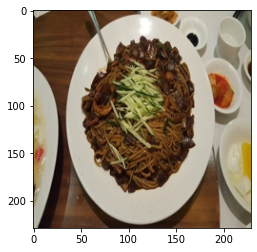

In [24]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

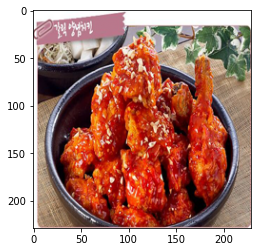

In [26]:
import matplotlib.pyplot as plt

plt.imshow(X_train[-1])

In [27]:
y_train[-1]

array([0, 0, 1, 0, 0, 0])

In [7]:
print(y_train)

[[0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 ...
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]]


In [8]:
categories = ["삼겹살",'삼계탕','양념치킨','짜장면','피자','후라이드치킨']
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [9]:
NUM_CLASSES = 6

CHANNELS = 3

IMAGE_RESIZE = 229
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
LOSS_METRICS = ['accuracy']

In [10]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import Dense, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D

base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(229, 229, 3)))
# base_model.load_weights('/content/drive/MyDrive/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = AveragePooling2D()(x)

x = Dropout(.5)(x)
x = Flatten()(x)
predictions = Dense(6, kernel_initializer='glorot_uniform', activation='softmax')(x)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model = Model(base_model.input,predictions)
model_dir = './model'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)

2.5.0
87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
model.summary()

In [12]:
from tensorflow.keras import optimizers

# optimizer, compile
sgd = optimizers.SGD(lr = 0.01, decay=1e-6,  momentum = 0.9, nesterov=True)
model.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau

# def schedule(epoch):
#     if epoch < 5:
#         return 0.001
#     elif epoch < 10:
#         return .0002
#     elif epoch < 15:
#         return 0.00002
#     else:
#         return .0000005
#lr_scheduler = LearningRateScheduler(schedule)
csv_logger = CSVLogger('/content/drive/MyDrive/project_7.log')
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/project_7.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only=True)




history = model.fit(X_train, y_train, validation_data=(X_test,y_test),
                              batch_size=64,
                              epochs=50,
                              callbacks=[csv_logger, checkpointer,early_stopping, checkpoint])

Epoch 1/50
69/69 [==============================] - 30s 148ms/step - loss: 3.5020 - accuracy: 0.7984 - val_loss: 1.0250 - val_accuracy: 0.9034

Epoch 00001: val_loss improved from inf to 1.02496, saving model to /content/drive/MyDrive/project_7.01-1.02.hdf5

Epoch 00001: val_loss improved from inf to 1.02496, saving model to ./model/multi_img_classification.model
INFO:tensorflow:Assets written to: ./model/multi_img_classification.model/assets
Epoch 2/50
69/69 [==============================] - 8s 109ms/step - loss: 0.6555 - accuracy: 0.9251 - val_loss: 0.8747 - val_accuracy: 0.9110

Epoch 00002: val_loss improved from 1.02496 to 0.87470, saving model to /content/drive/MyDrive/project_7.02-0.87.hdf5

Epoch 00002: val_loss improved from 1.02496 to 0.87470, saving model to ./model/multi_img_classification.model
INFO:tensorflow:Assets written to: ./model/multi_img_classification.model/assets
Epoch 3/50
69/69 [==============================] - 7s 109ms/step - loss: 0.3044 - accuracy: 0.9543

In [14]:
#history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

In [15]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

46/46 [==============================] - 3s 57ms/step - loss: 0.7073 - accuracy: 0.9192
정확도 : 0.9192


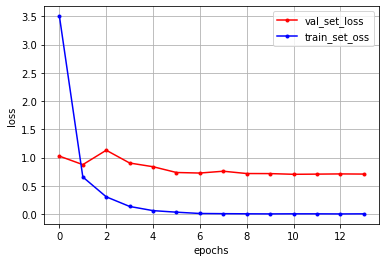

In [16]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [29]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/MyDrive/test"
image_w = 229
image_h = 229

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('/content/model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

print(prediction)

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.  ategories = ["삼겹살",'삼계탕','양념치킨','짜장면','피자','후라이드치킨']
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "삼겹살"
    elif pre_ans == 1: pre_ans_str = "삼계탕"
    elif pre_ans == 2: pre_ans_str = "양념치킨"
    elif pre_ans == 3: pre_ans_str = "짜장면"
    elif pre_ans == 4: pre_ans_str = "피자"
    else: pre_ans_str = "후라이드치킨"
    if i[0] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"으 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[4] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[5] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.

[[0.000 0.000 0.000 0.000 1.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000]]
[0.000 0.000 0.000 0.000 1.000 0.000]
4
해당 /content/drive/MyDrive/test/후라이드.jfif이미지는 피자로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000 0.000]
0
해당 /content/drive/MyDrive/test/삼겹살.jfif이미지는 삼겹살로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000 0.000]
0
해당 /content/drive/MyDrive/test/삼계탕.jfif이미지는 삼겹살로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000 0.000]
4
해당 /content/drive/MyDrive/test/자장면.jpg이미지는 피자로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000 0.000]
4
해당 /content/drive/MyDrive/test/피자.jfif이미지는 피자로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000 0.000]
0
해당 /content/drive/MyDrive/test/삼계탕3.jfif이미지는 삼겹살로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000 0.000]
0
해당 /content/drive/MyDrive/test/삼계탕2.jfif이미